In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = os.getcwd()

OG = pd.read_csv(directory + '/input_data.csv', sep=',')

In [3]:
OG.columns

Index(['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY',
       'INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY',
       'HELD_INDICATOR', 'T0', 'T1', 'T3', 'T4', 'T5',
       ...
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object', length=604)

In [4]:
data_wrk = OG.copy()


In [71]:
#bins; change n to change num of bins
n = 12 
max = 1025
bin_width = max/n #+1 because we have n bins so n+1 endpoints
bin_width

85.41666666666667

In [72]:
#bin ranges
bins = np.arange(0,max+bin_width,bin_width)
bins

array([   0.        ,   85.41666667,  170.83333333,  256.25      ,
        341.66666667,  427.08333333,  512.5       ,  597.91666667,
        683.33333333,  768.75      ,  854.16666667,  939.58333333,
       1025.        ])

In [73]:
#labels for bin ranges
labels = list(range(1,n+1))
labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [13]:
#df to visualize bins
df = pd.DataFrame(data = labels)
df['start'] = bins[:bins.shape[0]-1]
df['end'] = bins[1:]
df

,0,start,end
0,1,0.0,205.0
1,2,205.0,410.0
2,3,410.0,615.0
3,4,615.0,820.0
4,5,820.0,1025.0


In [74]:
#coding continuous data based on bins/labels, removing continuous data cols
data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])
data.head()

,INITIAL_SEVERITY_LEVEL_CODE,INCIDENT_RESPONSE_SECONDS_QY,HELD_INDICATOR,T0,T1,T3,T4,T5,T6,T7,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,INCIDENT_TRAVEL_TM_SECONDS_QY_Bin
0,5,740.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9
1,2,409.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
2,5,596.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,7
3,1,501.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,6
4,3,264.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,3


In [75]:
#X is predictors, Y is value to be predicted
X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

# AdaBoost Classifier

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

AdaBoost uses Decision Tree Classifier as default Classifier.

base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.

n_estimators: Number of weak learners to train iteratively.

learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting.

AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. 

AdaBoost is similar to Random Forest in that they both tally up the predictions made by each decision trees within the forest to decide on the final classification. There are however, some subtle differences. For instance, in AdaBoost, the decision trees have a depth of 1 (i.e. 2 leaves). In addition, the predictions made by each decision tree have varying impact on the final prediction made by the model.

In [6]:
from sklearn.ensemble import AdaBoostClassifier

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=1100,
    learning_rate=1)

In [9]:
# bdt_discrete = AdaBoostClassifier(
#     DecisionTreeClassifier(max_depth=2),
#     n_estimators=600,
#     learning_rate=1.5,
#     algorithm="SAMME")

In [78]:
bdt_real.fit(X_train, Y_train)
# bdt_discrete.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=1100, random_state=None)

In [83]:
print('\n')
print("Accuracy:", str(bdt_real.score(X_test, Y_test)))



Accuracy: 0.81224


In [22]:
print("BDT REAL")
rf_pred = bdt_real.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, rf_pred))
print('\n')
print("Accuracy:", str(bdt_real.score(X_test, Y_test)))

BDT REAL
=== Confusion Matrix ===
[[1018  409    0    0    0]
 [   2 5387   45    0    0]
 [   0   20 3637    4    0]
 [   0    0   60 1387    3]
 [   0    0    0   40  488]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       1.00      0.71      0.83      1427
          2       0.93      0.99      0.96      5434
          3       0.97      0.99      0.98      3661
          4       0.97      0.96      0.96      1450
          5       0.99      0.92      0.96       528

avg / total       0.96      0.95      0.95     12500



Accuracy: 0.95336


In [23]:
print("BDT DISCRETE")
rf_pred = bdt_discrete.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, rf_pred))
print('\n')
print("Accuracy:", str(bdt_discrete.score(X_test, Y_test)))

BDT DISCRETE
=== Confusion Matrix ===
[[1266  161    0    0    0]
 [  12 5415    7    0    0]
 [   0  411 3149  101    0]
 [   0    0    0 1417   33]
 [   0    0    0    6  522]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.99      0.89      0.94      1427
          2       0.90      1.00      0.95      5434
          3       1.00      0.86      0.92      3661
          4       0.93      0.98      0.95      1450
          5       0.94      0.99      0.96       528

avg / total       0.95      0.94      0.94     12500



Accuracy: 0.94152


In [25]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [26]:
predictions = classifier.predict(X_test)

In [27]:
print("Cassifier")
rf_pred = predictions
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, rf_pred))
print('\n')
print("Accuracy:", str(classifier.score(X_test, Y_test)))

Cassifier
=== Confusion Matrix ===
[[   0 1427    0    0    0]
 [   0 5225  209    0    0]
 [   0   74 3473  114    0]
 [   0    0    8 1369   73]
 [   0    0    0    2  526]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1427
          2       0.78      0.96      0.86      5434
          3       0.94      0.95      0.94      3661
          4       0.92      0.94      0.93      1450
          5       0.88      1.00      0.93       528

avg / total       0.76      0.85      0.80     12500



Accuracy: 0.84744


In [ ]:
ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

## Hyper Parameter Tuning

In [30]:
res = dict()
for d in n_est:
    res[d] = list()



In [36]:
res

{300: [0.93664],
 400: [0.93816],
 500: [0.96056],
 600: [0.95272],
 700: [],
 800: []}

In [32]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[300].append(bdt_real.score(X_test, Y_test))

In [33]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=400,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[400].append(bdt_real.score(X_test, Y_test))

In [34]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=500,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[500].append(bdt_real.score(X_test, Y_test))

In [35]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[600].append(bdt_real.score(X_test, Y_test))

In [37]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=700,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[700].append(bdt_real.score(X_test, Y_test))

In [38]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=800,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[800].append(bdt_real.score(X_test, Y_test))

In [39]:
res

{300: [0.93664],
 400: [0.93816],
 500: [0.96056],
 600: [0.95272],
 700: [0.96896],
 800: [0.97016]}

In [45]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=900,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[900].append(bdt_real.score(X_test, Y_test))

In [46]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=1000,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[1000].append(bdt_real.score(X_test, Y_test))

In [47]:
res

{300: [0.93664],
 400: [0.93816],
 500: [0.96056],
 600: [0.95272],
 700: [0.96896],
 800: [0.97016],
 900: [0.97016],
 1000: [0.97904]}

In [48]:
res[1100] = []
res[1200] = []
res[1300] = []
res

{300: [0.93664],
 400: [0.93816],
 500: [0.96056],
 600: [0.95272],
 700: [0.96896],
 800: [0.97016],
 900: [0.97016],
 1000: [0.97904],
 1100: [],
 1200: [],
 1300: []}

In [51]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=1100,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[1100].append(bdt_real.score(X_test, Y_test))

In [53]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=1200,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[1200].append(bdt_real.score(X_test, Y_test))

In [55]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=1300,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)
rf_pred = bdt_real.predict(X_test)
res[1300].append(bdt_real.score(X_test, Y_test))

In [56]:
res

{300: [0.93664],
 400: [0.93816],
 500: [0.96056],
 600: [0.95272],
 700: [0.96896],
 800: [0.97016],
 900: [0.97016],
 1000: [0.97904],
 1100: [0.98368],
 1200: [0.97632],
 1300: [0.97272]}

In [58]:
summary = pd.DataFrame(res)

In [94]:
summary = summary.transpose()
summary.rename(columns = {0:'AdaBoost Accuracy'}, inplace = True) 

In [98]:
summary.transpose().rename(columns = {0:'AdaBoost Accuracy'}, inplace = True) 

In [100]:
summary = summary.transpose()

In [111]:
list(res.values())

[[0.93664],
 [0.93816],
 [0.96056],
 [0.95272],
 [0.96896],
 [0.97016],
 [0.97016],
 [0.97904],
 [0.98368],
 [0.97632],
 [0.97272]]

Text(0.5,1,'Accuracy by n_estimators for AdaBoost')

<Figure size 576x360 with 0 Axes>

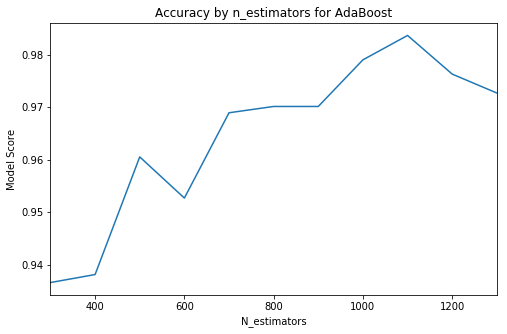

In [135]:
plt.rcParams['figure.figsize'] = 8,5
#Now plot            
fig = plt.figure()
summary.plot(kind='line', legend=None)
plt.xlabel('N_estimators')
plt.ylabel('Model Score')
plt.title('Accuracy by n_estimators for AdaBoost')

# fig = plt.figure()
# ax = fig.add_subplot(111)

# A=[300, 400, 500, 600, 700, 800, 900, 1000,1100,1200,1300]
# B = [0.93664, 0.93816,0.96056,0.95272,
#  0.96896,
#  0.97016,
#  0.97016,
#  0.97904,
#  0.98368,
#  0.97632,
#  0.97272]
# plt.plot(A,B)
# for xy in zip(A, B): 
#     ax.annotate('%0.3f' % x, xy=xy, textcoords='data') # <--

# plt.show()

In [64]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=1100,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=1100, random_state=None)

In [65]:
print("BDT REAL")
rf_pred = bdt_real.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, rf_pred))
print('\n')
print("Accuracy:", str(bdt_real.score(X_test, Y_test)))

BDT REAL
=== Confusion Matrix ===
[[1339   88    0    0    0]
 [   6 5334   94    0    0]
 [   0    7 3649    5    0]
 [   0    0   42 1405    3]
 [   0    0    0   46  482]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       1.00      0.94      0.97      1427
          2       0.98      0.98      0.98      5434
          3       0.96      1.00      0.98      3661
          4       0.96      0.97      0.97      1450
          5       0.99      0.91      0.95       528

avg / total       0.98      0.98      0.98     12500



Accuracy: 0.97672


## 50,000 samples

In [ ]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.copy()
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=1100, learning_rate=1)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

# 25,000 samples

In [69]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.sample(n = 25000)
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=1100, learning_rate=1)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

Accuracy: 5 0.86336
Accuracy: 12 0.78736
Accuracy: 25 0.63872
Accuracy: 41 0.4296


# 10,000 samples

In [68]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.sample(n = 10000)
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=1100, learning_rate=1)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

Accuracy: 5 0.8756
Accuracy: 12 0.814
Accuracy: 25 0.4732
Accuracy: 41 0.4072


# 5,000 samples

In [67]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.sample(n = 5000)
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=1100, learning_rate=1)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

Accuracy: 5 0.8904
Accuracy: 12 0.8288
Accuracy: 25 0.5704
Accuracy: 41 0.4368


# 1,000 Samples

In [66]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.sample(n = 1000)
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=1100, learning_rate=1)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

Accuracy: 5 0.884
Accuracy: 12 0.828
Accuracy: 25 0.516
Accuracy: 41 0.412


In [86]:
ADA5 = [0.884, 0.8904 ,0.8756 ,0.86336 , 0.97672]
ADA12 = [0.828,0.8288 ,0.814 ,0.78736 , 0.81224]
ADA25 = [0.516,0.5704 ,0.4732 ,0.63872 , 0.75684]
ADA41 = [0.412,0.4368 ,0.4072 ,0.4296 , 0.62224]

In [87]:
frames = [ADA5, ADA12, ADA25, ADA41]

summary_df = pd.DataFrame(frames, index = ['ADA5', 'ADA12', 'ADA25', 'ADA41'], columns=['1k', '5k', '10k', '25k', '50k'])

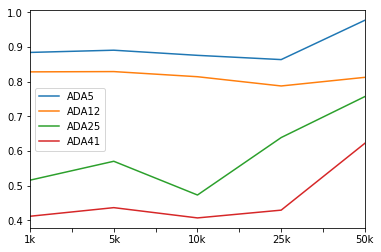

In [88]:
summary_df.transpose().plot()